###Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


####importing the library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#checking tensorflow version
tf.__version__

'2.8.0'

In [ ]:
#rermoving warnings
import warnings
warnings.filterwarnings('ignore')

####import the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Churn_Modelling.csv')
display(df.head(7))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#checking the rowns & column
print('this dataset has ' + str(df.shape[0]) + ' columns & ' + str(df.shape[1]) + ' rows')

this dataset has 10000 columns & 14 rows


In [ ]:
#checking the missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

####showing the values count for each column

In [ ]:
# #checking the unwanted data in this dataset
# def check_unwanted(x):
#   var = df[x].value_counts()
#   var = pd.DataFrame(var)
#   var = var.reset_index()
#   var = var.rename(columns = {'index': x, x:'values'})
#   return var

In [ ]:
# check_1 = check_unwanted('Gender')
# display(check_1)
# check_2 = check_unwanted('Geography')
# display(check_2)

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#df['Geography'].unique()

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

From the general perspective of view we can say that the feature **RowNumber**, **CustomerId**, **Surname** has no impact if the customer would leave the bank or not. So we can drop these three columns.

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True) 
df.head(5)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


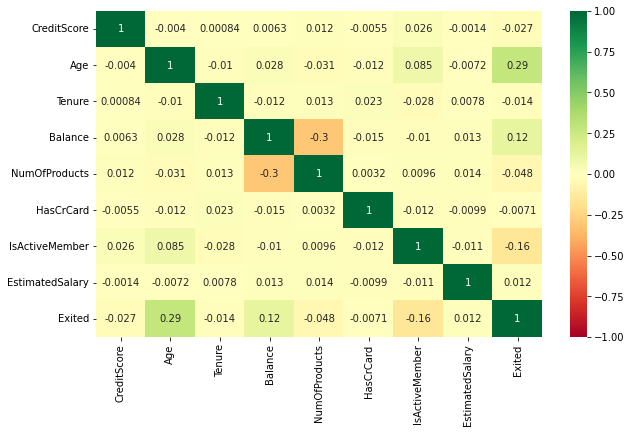

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), cmap = 'RdYlGn', vmax = 1, vmin = -1, annot = True)

In [ ]:
df.shape

(10000, 11)

####Checking the column importance by mutual_information gain
**Things to keep remember:**
There are two types of information gain.<br>
(a) information gain for categorical<br> (applicable if, independent variable = caontinous & target variable = categorical)<br>
(b) information gain gor regression

##Very important things:
We must check column imporatance after train_test_split to avoid overfitting.<br>
But for learning purpose we are doing it before train_test_split.



In [ ]:
mutual = df[['CreditScore', 'Age','Tenure','Balance','EstimatedSalary']]
#import the library
mutual_info = mutual_info_classif(mutual,df[['Exited']])
mutual_info

array([0.0020607 , 0.07576848, 0.0016235 , 0.01008035, 0.00270393])

In [ ]:
mutual_info = pd.DataFrame(mutual_info)
mutual_info.index = mutual.columns
mutual_info.reset_index()
display(mutual_info)

,0
CreditScore,0.002061
Age,0.075768
Tenure,0.001624
Balance,0.010080
EstimatedSalary,0.002704


####Encoding the categorical columns

Label Encoding for categorical **GENDER** data

In [ ]:
df.shape

(10000, 11)

In [ ]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df.shape

(10000, 11)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.shape

(10000, 13)

In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
X = df.drop(['Exited'], axis= 1)
y = df[['Exited']]

In [ ]:
exit_col = df['Exited'].value_counts()
exit_col = pd.DataFrame(exit_col)
exit_col = exit_col.reset_index()
exit_col = exit_col.rename(columns = {'index':'is_exited','Exited':'Values'})
exit_col['percentage_of_leave'] = exit_col['Values']/exit_col['Values'].sum()
display(exit_col)


,is_exited,Values,percentage_of_leave
0,0,7963,0.7963
1,1,2037,0.2037


###assumption:<br>
may be it's a imbalance dataset. So may be we have to handle it

####Splitting the dataset

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state= 42, stratify = y)

###Stratification Purpose

In [ ]:
class_0_train = y_train['Exited'].value_counts().values[0]
class_1_train = y_train['Exited'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print(train_ratio)

0.25588697017268447


In [ ]:
class_0_test = y_test['Exited'].value_counts().values[0]
class_1_test = y_test['Exited'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print(test_ratio)

0.25549278091650973


**Stratification** indicates that 25.6% of data are class 1 & 74.4% of data are class 0. So the <br>ratio for 0 & 1  class in train & test data are same for all data.  

###Feature Scaling

In [ ]:

sc = StandardScaler( )
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


####Building the ANN

In [ ]:
# #Initializing the ANN
# ann = tf.keras.models.Sequential()

In [ ]:
# #Adding the input layer & first hidden layer
# ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [ ]:
# #Adding the 2nd hidden layer
# ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [ ]:
# #adding the output layer
# ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

###Training the Ann

In [ ]:
# ann.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

###Predicting the results

In [ ]:
# y_pred_ann = ann.predict(X_test)


In [ ]:
# y_test['predicted_exit'] = y_pred_ann
# y_test['predicted_exit'] = y_test['predicted_exit']>0.5
# y_test['predicted_exit'] = y_test['predicted_exit'].replace({False:0, True: 1})
# y_test_ann = y_test.rename(columns = {'Exited':'actual_exit'})
# display(y_test_ann)

###Accuracy metrics

In [ ]:
# #importing the library

# cm_ann = confusion_matrix(y_test_ann['actual_exit'], y_test_ann['predicted_exit'])
# print(cm_ann)



In [ ]:
# ax_ann = sns.heatmap(cm_ann, annot = True, cmap = 'RdYlGn', fmt="d", center=0)
# ax_ann.xaxis.set_ticklabels(['will not exit','will exit'])
# ax_ann.yaxis.set_ticklabels(['will not exit','will exit'])
# plt.xlabel('Predicted_data')
# plt.ylabel('Actual_data')
# plt.title('Confusion_Matrix')
# plt.show()

In [ ]:
# True_Negative = cm_ann[0][0]
# False_Negative = cm_ann[1][0]
# True_positive = cm_ann[1][1]
# False_Positive = cm_ann[0][1]
# print("True_Negative : ", True_Negative)  #actually exit & predicted also exit 
# print("False_Negative : ", False_Negative) #actually exit but predicted will not exit
# print('True_positive : ', True_positive) #actually exit & predicted also exit
# print('False_Positive : ',False_Positive) #actually will not exit but predicted exit

In [ ]:
#Accuracy by formula

# accuracy = (True_positive + True_Negative)/(True_positive + True_Negative+ False_Positive + False_Negative)
# print(accuracy)

In [ ]:
# #accuracy by sklearn 
# accuracy_ann = accuracy_score(y_test_ann['actual_exit'],y_test_ann['predicted_exit'])
# print(accuracy_ann)

In [ ]:

# precision_ann = np.round(precision_score(y_test_ann['actual_exit'],y_test_ann['predicted_exit']),3)  #precision = (TP)/(TP+FP)
# recall_ann = np.round(recall_score(y_test_ann['actual_exit'],y_test_ann['predicted_exit']),3)  #recall = (TP)+(TP+FN)
# f1_score_ann = np.round(f1_score(y_test_ann['actual_exit'],y_test_ann['predicted_exit']),3)  #f1_score = (2*precision*recall)/(precision+recall)
# print('precision = ', precision_ann)
# print('recall = ', recall_ann)
# print('f1_score = ', f1_score_ann)

**Precision, Recall, F1_Score higher is better**

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
DT = DecisionTreeClassifier(random_state= 42)
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_DT = DT.predict(X_test)

In [ ]:
y_test['predicted_exit'] = y_pred_DT
y_test['predicted_exit'] = y_test['predicted_exit']>0.5
y_test['predicted_exit'] = y_test['predicted_exit'].replace({False:0, True: 1})
y_test_DT = y_test.rename(columns = {'Exited':'actual_exit'})
display(y_test_DT)

,actual_exit,predicted_exit
5702,0,0
3667,0,0
1617,0,0
5673,0,0
4272,0,0
...,...,...
5768,0,0
833,0,0
9719,1,1
2776,0,0


In [ ]:
cm_DT = confusion_matrix(y_test_DT['actual_exit'],y_test_DT['predicted_exit'])
print(cm_DT)

[[1360  233]
 [ 192  215]]


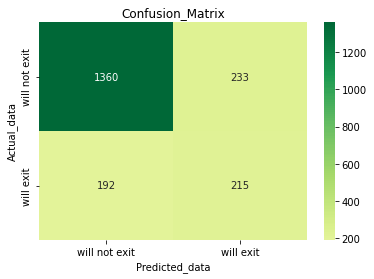

In [ ]:
ax_DT = sns.heatmap(cm_DT, annot = True, cmap = 'RdYlGn', fmt="d", center=0)
ax_DT.xaxis.set_ticklabels(['will not exit','will exit'])
ax_DT.yaxis.set_ticklabels(['will not exit','will exit'])
plt.xlabel('Predicted_data')
plt.ylabel('Actual_data')
plt.title('Confusion_Matrix')
plt.show()

In [ ]:
accuracy_DT = accuracy_score(y_test_DT['actual_exit'],y_test_DT['predicted_exit'])
print(accuracy_DT)

0.7875


In [ ]:
precision_DT = np.round(precision_score(y_test_DT['actual_exit'],y_test_DT['predicted_exit']),3)  #precision = (TP)/(TP+FP)
recall_DT = np.round(recall_score(y_test_DT['actual_exit'],y_test_DT['predicted_exit']),3)  #recall = (TP)+(TP+FN)
f1_score_DT = np.round(f1_score(y_test_DT['actual_exit'],y_test_DT['predicted_exit']),3)  #f1_score = (2*precision*recall)/(precision+recall)
print('precision = ', precision_DT)
print('recall = ', recall_DT)
print('f1_score = ', f1_score_DT)

precision =  0.48
recall =  0.528
f1_score =  0.503


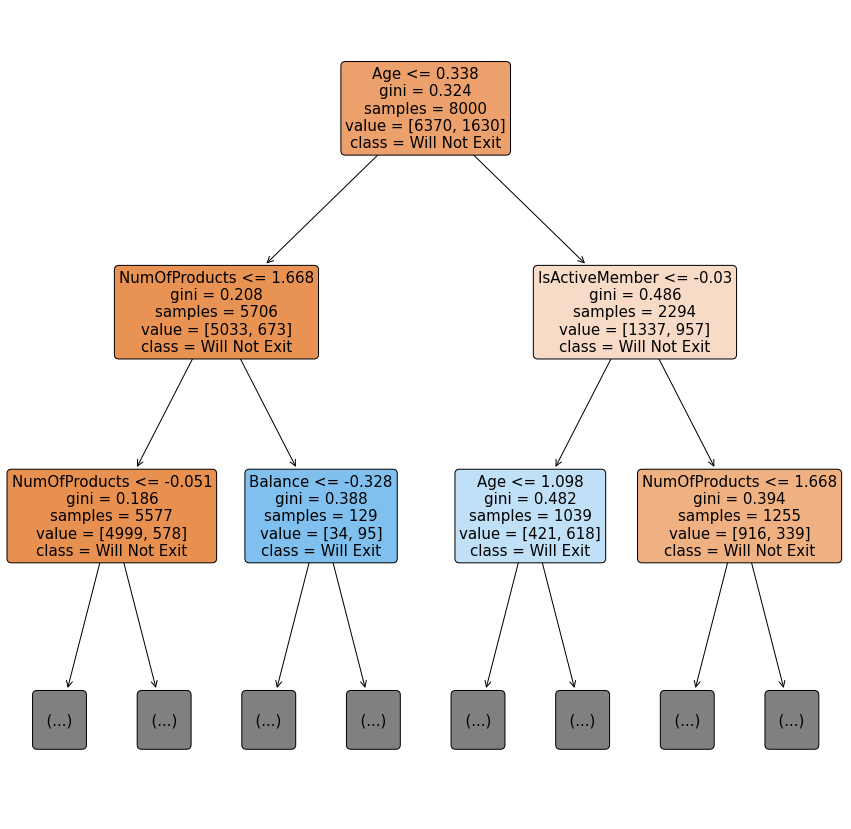

In [ ]:
plt.figure(figsize = (15, 15))
plot_tree(DT, 
          filled=True,
          rounded=True,
          class_names = ["Will Not Exit", "Will Exit"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

###Hyperparameter for Decision Tree

In [ ]:
parameters = {
    'criterion':['gini', 'entropy'],
    'max_depth': [1,3,5,7,9,11,12],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
    'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]

}

In [ ]:
DT_hyperparameter = DecisionTreeClassifier(random_state=42)
grid_search_DT = GridSearchCV(estimator=DT_hyperparameter,
                           param_grid=parameters,
                           scoring= ['recall','f1'],
                           cv= 5,
                           n_jobs=-1,
                           verbose = 2,
                           refit='recall')

In [ ]:
grid_result_DT = grid_search_DT.fit(X_train,y_train)

Fitting 5 folds for each of 50400 candidates, totalling 252000 fits


In [ ]:
y_pred_hyper_DT = grid_result_DT.predict(X_test)

In [ ]:
y_test['predicted_exit'] = y_pred_hyper_DT
y_test['predicted_exit'] = y_test['predicted_exit']>0.5
y_test['predicted_exit'] = y_test['predicted_exit'].replace({False:0, True: 1})
y_test_hyper_DT = y_test.rename(columns = {'Exited':'actual_exit'})
display(y_test_hyper_DT)

,actual_exit,predicted_exit
5702,0,0
3667,0,0
1617,0,0
5673,0,0
4272,0,0
...,...,...
5768,0,0
833,0,0
9719,1,1
2776,0,0


In [ ]:
accuracy_hyper_DT = accuracy_score(y_test_hyper_DT['actual_exit'],y_test_hyper_DT['predicted_exit'])
print(accuracy_hyper_DT)

0.8245


In [ ]:
cm_hyper_DT = confusion_matrix(y_test_hyper_DT['actual_exit'],y_test_hyper_DT['predicted_exit'])
print(cm_hyper_DT)

[[1489  104]
 [ 247  160]]


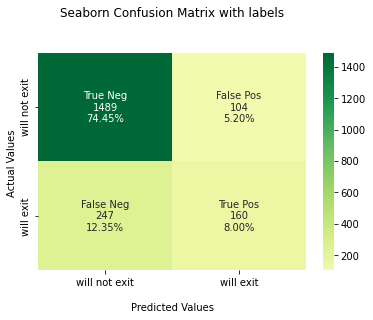

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_hyper_DT.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_hyper_DT.flatten()/np.sum(cm_hyper_DT)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax_hyper_DT = sns.heatmap(cm_hyper_DT, annot=labels, fmt="", cmap='RdYlGn', center=0)

ax_hyper_DT.set_title('Seaborn Confusion Matrix with labels\n\n');
ax_hyper_DT.set_xlabel('\nPredicted Values')
ax_hyper_DT.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax_hyper_DT.xaxis.set_ticklabels(['will not exit','will exit'])
ax_hyper_DT.yaxis.set_ticklabels(['will not exit','will exit'])

## Display the visualization of the Confusion Matrix.
plt.show()



# ax_hyper_DT = sns.heatmap(cm_hyper_DT, annot = True, cmap = 'RdYlGn', fmt="d", center=0)
# ax_hyper_DT.xaxis.set_ticklabels(['will not exit','will exit'])
# ax_hyper_DT.yaxis.set_ticklabels(['will not exit','will exit'])
# plt.xlabel('Predicted_data')
# plt.ylabel('Actual_data')
# plt.title('Confusion_Matrix')
# plt.show()

In [ ]:
grid_result_DT.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1}

In [ ]:
precision_hyper_DT = np.round(precision_score(y_test_hyper_DT['actual_exit'],y_test_hyper_DT['predicted_exit']),3)  #precision = (TP)/(TP+FP)
recall_hyper_DT = np.round(recall_score(y_test_hyper_DT['actual_exit'],y_test_hyper_DT['predicted_exit']),3)  #recall = (TP)+(TP+FN)
f1_score_hyper_DT = np.round(f1_score(y_test_hyper_DT['actual_exit'],y_test_hyper_DT['predicted_exit']),3)  #f1_score = (2*precision*recall)/(precision+recall)
print('precision = ', precision_hyper_DT)
print('recall = ', recall_hyper_DT)
print('f1_score = ', f1_score_hyper_DT)

precision =  0.606
recall =  0.393
f1_score =  0.477


In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(y_pred_hyper_DT['actual_exit'], y_pred_hyper_DT['predicted_exit']))